# Clip and remove noise from rasters
This notebook demonstrates how to clip rasters and filter them using textures.

In [ ]:
!wget -nc -q https://github.com/casperfibaek/buteo/raw/master/geometry_and_rasters/s2_b04_baalbeck.tif
!wget -nc -q https://github.com/casperfibaek/buteo/raw/master/geometry_and_rasters/balbek_utm36.gpkg
!pip install buteo --upgrade -q

In [ ]:
import buteo as beo
from osgeo import gdal
from matplotlib import pyplot as plt

VECTOR = "/content/balbek_utm36.gpkg"
RASTER = "/content/s2_b04_baalbeck.tif"

In [ ]:
# Turn the raster into a numpy array
arr = beo.raster_to_array(RASTER)

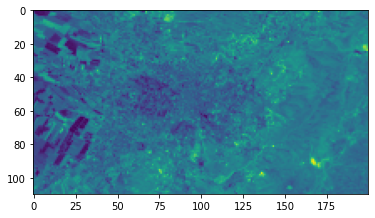

In [ ]:
# Visualize the raster
plt.imshow(arr[:, :, 0])

In [ ]:
# Uses all available ram and then crashes
clipped_raster = beo.clip_raster(RASTER, VECTOR) # When no output is specified a memory raster is created.

In [ ]:
# Convert the clipped raster into an array.
clipped_arr = beo.raster_to_array(clipped_raster).filled(0) # set nodata to 0.0

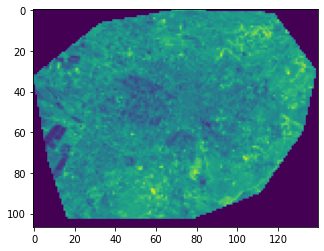

In [ ]:
# Visualize the clipped raster
plt.imshow(clipped_arr[:, :, 0], vmin=300, vmax=7000) # visualise the range [300, 7000] (normal for s2 imagery.)

In [ ]:
# Use a 3x3 median filter to remove noise in the image
filtered = beo.texture_local_median(clipped_arr, filter_size=3, spherical=True, nodata=True, nodata_value=0)

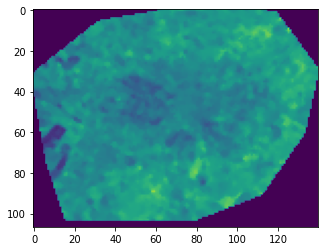

In [ ]:
# Visualize the filtered raster
plt.imshow(filtered[:, :, 0], vmin=300.0, vmax=7000.0)